# [Wine Reviews - Kaggle](https://www.kaggle.com/zynicide/wine-reviews)

## **데이터셋 소개** :
Somm(소믈리에와 관련된 다큐멘터리)을 보고 난 후 소믈리에처럼 블라인드테스트를 통해 와인을 식별할 수 있는 예측모델을 만들 수 있는지 궁금해졌어요. 우선 모델을 학습시키기 위해 데이터를 모았습니다. 다양한 리뷰를 분석하기 위해 딥러닝을 사용할 계획이에요. 이 모델은 여전히 와인 맛을 볼수는 없지만 이론적으로는 소믈리에가 주는 묘사를 토대로 와인을 식별할 수 있을거예요. 



이 데이터셋은 감정분석과 텍스트 예측 모델을 위한 훌륭한 기회를 제공할거예요. 와인에 대한 묘사를 바탕으로 와인의 다양성, 와이너리의 위치를 식별할 수 있는 모델을 만들어보세요.

## plotnine

plotnine은 grammar of graphics(그래픽 문법)을 구현하는 데이터 시각화 라이브러리입니다. grammar of graphics은 데이터 시각화 API 디자인에 대한 접근 방식으로, 지금까지의 그래픽 라이브러리와는 확연하게 다릅니다.

* 1) 우선 figure를 그립니다.
* 2) figure를 조정하고
* 3) 특징을 표현 합니다.

grammar of graphics은 어려운 문제를 해결해요. 그래픽기반 라이브러리의 문법에서 모든 연산은 함수 사용과 같은 방식으로 표현해요. 플롯나인에서는 "adding up"을 통해 그래프를 그릴거예요.

<img src='https://i.imgur.com/UoIbtqI.png'>

참고 :
* https://www.kaggle.com/residentmario/grammer-of-graphics-with-plotnine-optional
* https://www.kaggle.com/jihyeseo/grammer-of-graphics-with-plotnine-optional
* https://www.kaggle.com/leemun1/wine-reviews-eda-visualizations-with-plotnine
* https://plotnine.readthedocs.io/en/stable/api.html

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
reviews = pd.read_csv("data/winemag-data-130k-v2.csv", index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


* country                  : 어느 국가에서 온 와인인지
* description              : 소믈리에가 적은 와인의 맛, 향, 모습, 느낌 등
* designation              : 와이너리가 있는 포도밭의 지역
* points                   : 와인 애호가가 1~100점으로 평가한 점수(하지만 80점 이상인 와인에 대해서만 리뷰를 게시함)
* price                    : 한 병당 가격
* province                 : 와인이 온 지역이나 주
* region_1                 : 와인이 나온 지역이나 주(예. Napa)
* region_2                 : 재배 지역이 지정되어 있을 수도 있지만 비어있을 수 있다.
* taster_name              : 와인 리뷰어 이름
* taster_twitter_handle    : 트위터 계정
* title                    : 리뷰제목
* variety                  : 포도의 품종
* winery                   : 와인을 만드는 양조장

In [4]:
reviews.shape

(129971, 13)

In [5]:
reviews.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [6]:
reviews.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [7]:
from plotnine import *

In [8]:
# 와인을 만드는 데 사용되는 포도의 종류 (예, Pinot Noir)
wine_variety = reviews['variety'].value_counts().head(5)
wine_variety

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Name: variety, dtype: int64

In [9]:
top_wines = reviews[reviews['variety'].isin(wine_variety.index)]
top_wines.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
14,US,Building on 150 years and six generations of w...,NaN,87,12.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou
20,US,Ripe aromas of dark berries mingle with ample ...,Vin de Maison,87,23.0,Virginia,Virginia,NaN,Alexander Peartree,NaN,Quiévremont 2012 Vin de Maison Red (Virginia),Red Blend,Quiévremont


### The grammar of graphics

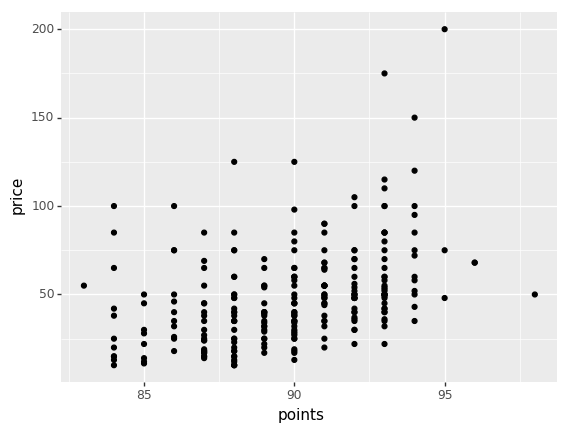

<ggplot: (295017697)>

In [10]:
# 점수별 와인가격
df = top_wines.head(1000).dropna()

(ggplot(df)
 + aes('points', 'price')
 + geom_point()
)

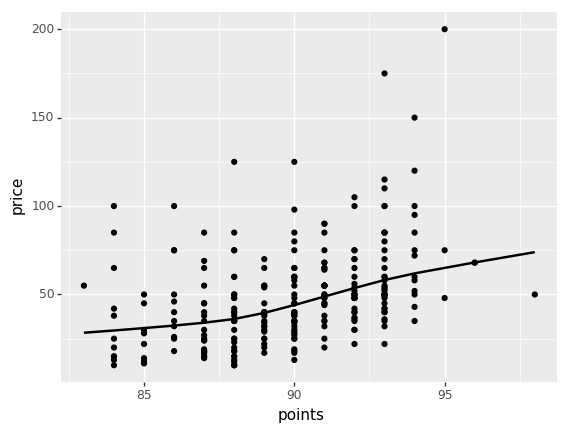

<ggplot: (296030237)>

In [11]:
df = top_wines.head(1000).dropna()

(ggplot(df)
 + aes('points', 'price')
 + geom_point()
 + stat_smooth()
)

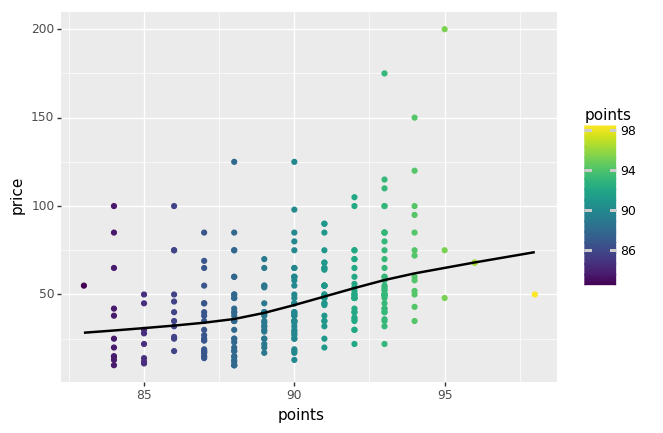

<ggplot: (296074581)>

In [12]:
df = top_wines.head(1000).dropna()

(ggplot(df)
 + geom_point()
 + aes(color='points')
 + aes('points', 'price')
 + stat_smooth()
)

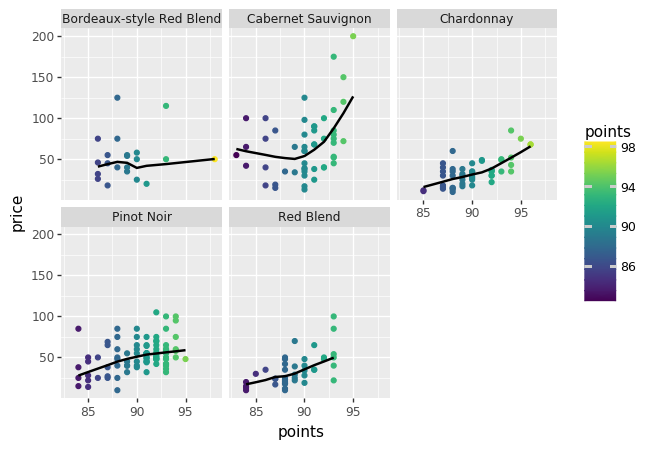

<ggplot: (-9223372036558673790)>

In [13]:
df = top_wines.head(1000).dropna()

(ggplot(df)
 + aes('points', 'price')
 + aes(color='points')
 + geom_point()
 + stat_smooth()
 + facet_wrap('~variety')
)

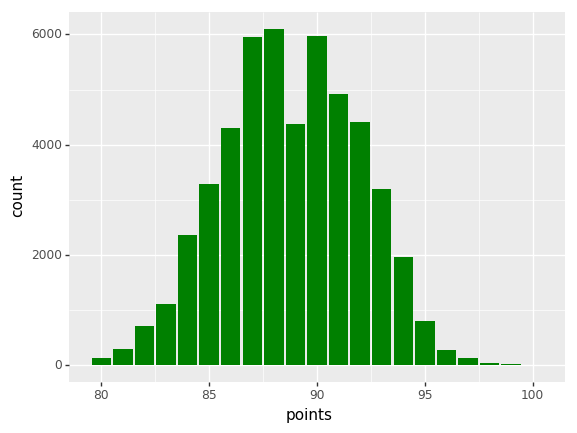

<ggplot: (-9223372036559758178)>

In [14]:
(ggplot(top_wines)
 + aes('points')
 + geom_bar(fill='green')
)

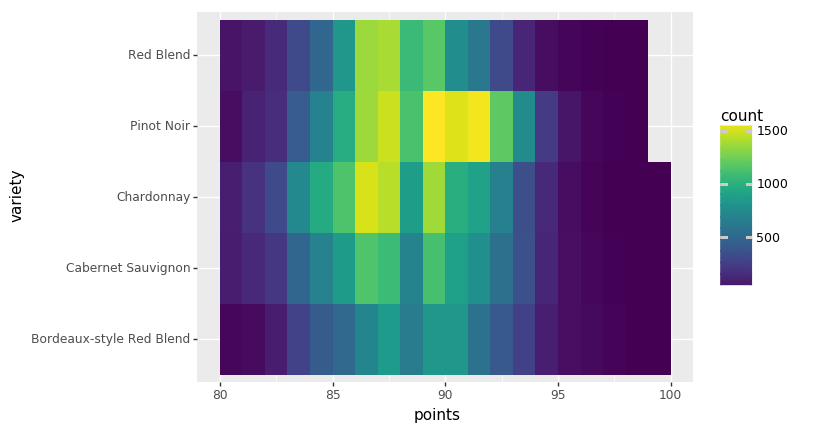

<ggplot: (-9223372036558312430)>

In [15]:
(ggplot(top_wines)
 + aes('points', 'variety')
 + geom_bin2d(bins=20)
)

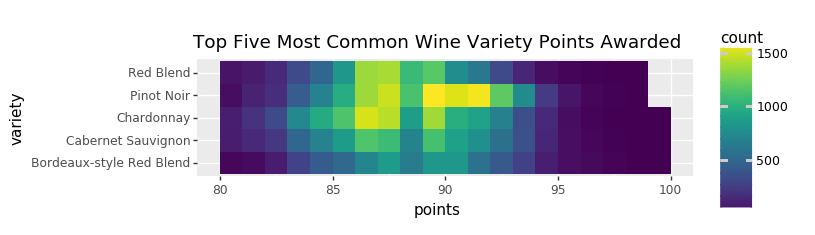

<ggplot: (-9223372036558370507)>

In [16]:
(ggplot(top_wines)
 + aes('points', 'variety')
 + geom_bin2d(bins=20)
 + coord_fixed(ratio=1)
 + ggtitle("Top Five Most Common Wine Variety Points Awarded")
)

### 국가

In [17]:
country = pd.DataFrame(reviews['country'].value_counts().head(10)).reset_index()
country.columns = ['country', 'count']
country

,country,count
0,US,54504
1,France,22093
2,Italy,19540
3,Spain,6645
4,Portugal,5691
5,Chile,4472
6,Argentina,3800
7,Austria,3345
8,Australia,2329
9,Germany,2165


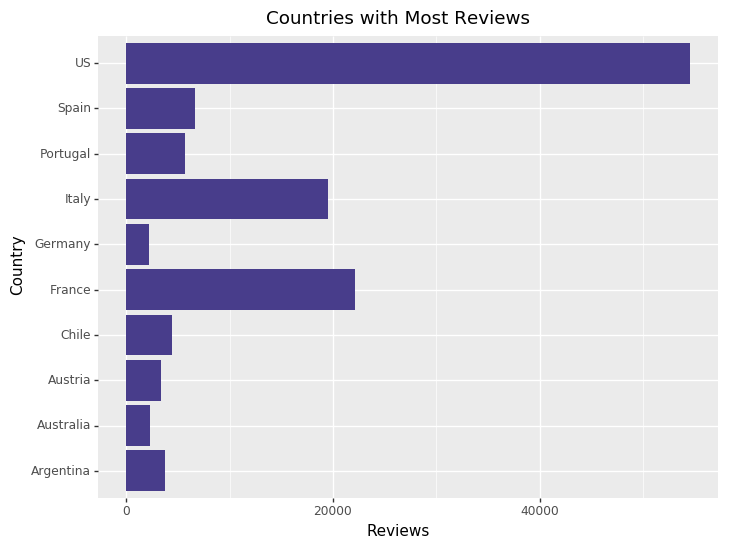

<ggplot: (296102983)>

In [18]:
# 국가별 리뷰 수
(ggplot(country)
 + aes(x='country', y='count')
 + geom_col(fill='darkslateblue')
 + ggtitle("Countries with Most Reviews")
 + xlab('Country')
 + ylab('Reviews')
 + coord_flip()
 + theme(figure_size=(8, 6))
)

In [19]:
variety = pd.DataFrame(reviews['variety'].value_counts().head(10)).reset_index()
variety.columns = ['variety', 'count']
variety

,variety,count
0,Pinot Noir,13272
1,Chardonnay,11753
2,Cabernet Sauvignon,9472
3,Red Blend,8946
4,Bordeaux-style Red Blend,6915
5,Riesling,5189
6,Sauvignon Blanc,4967
7,Syrah,4142
8,Rosé,3564
9,Merlot,3102


### 품종

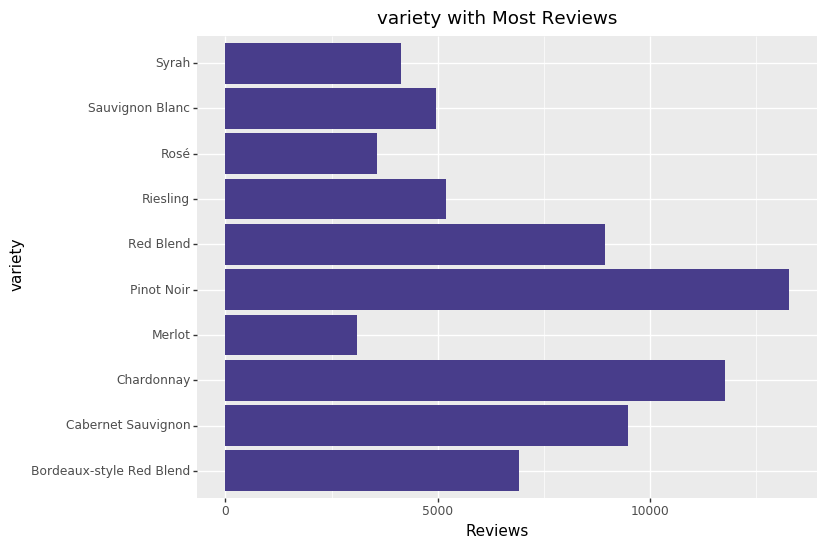

<ggplot: (296457427)>

In [20]:
# 품종별 리뷰 수
(ggplot(variety)
 + aes(x='variety', y='count')
 + geom_col(fill='darkslateblue')
 + ggtitle("variety with Most Reviews")
 + xlab('variety')
 + ylab('Reviews')
 + coord_flip()
 + theme(figure_size=(8, 6))
)

In [21]:
# 누가 가장 많은 맛을 보았는지?
reviews.loc[reviews.taster_name.isnull()].head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
31,Italy,Merlot and Nero d'Avola form the base for this...,Calanìca Nero d'Avola-Merlot,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2010 Calanìca Nero d'Avola-...,Red Blend,Duca di Salaparuta
32,Italy,"Part of the extended Calanìca series, this Gri...",Calanìca Grillo-Viognier,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Duca di Salaparuta


In [22]:
# fill missing values with "Unknown"
reviews.taster_name.fillna('Unknown', inplace=True)

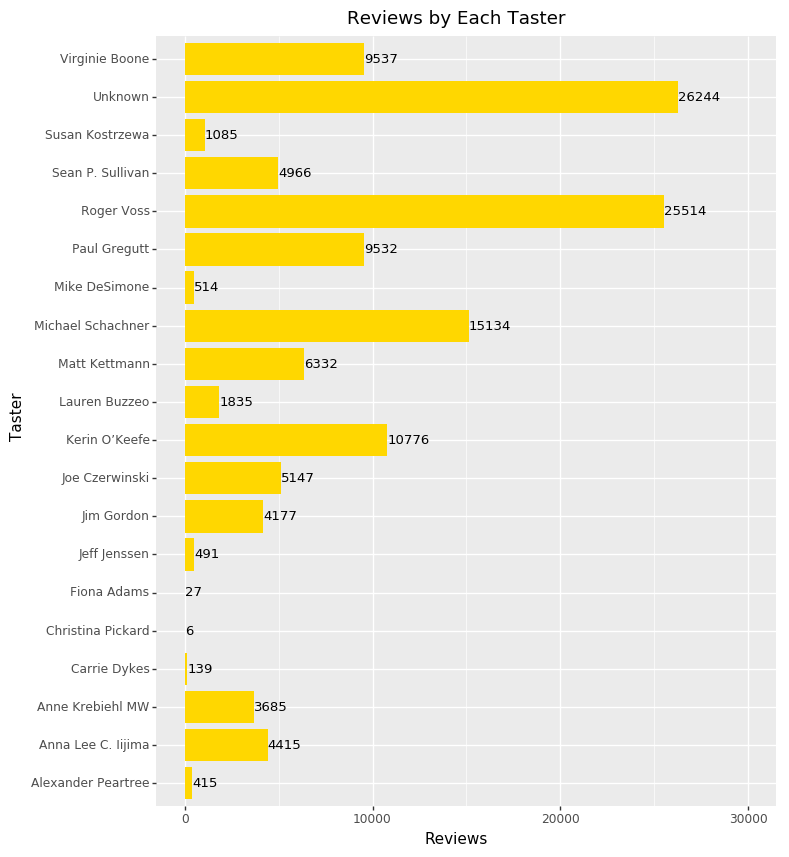

<ggplot: (-9223372036559653639)>

In [23]:
df = pd.DataFrame(reviews['taster_name'].value_counts()).reset_index()
df.columns = ['Taster', 'Reviews']

(ggplot(df)
 + aes(x='Taster', y='Reviews')
 + geom_col(fill='gold', width=0.85)
 + ggtitle("Reviews by Each Taster")
 + geom_text(aes(label='Reviews'), size=9.5, ha='left')
 + xlab('Taster')
 + ylab('Reviews')
 + coord_flip(ylim=(0, 30000))
 + theme(figure_size=(8, 10))
)

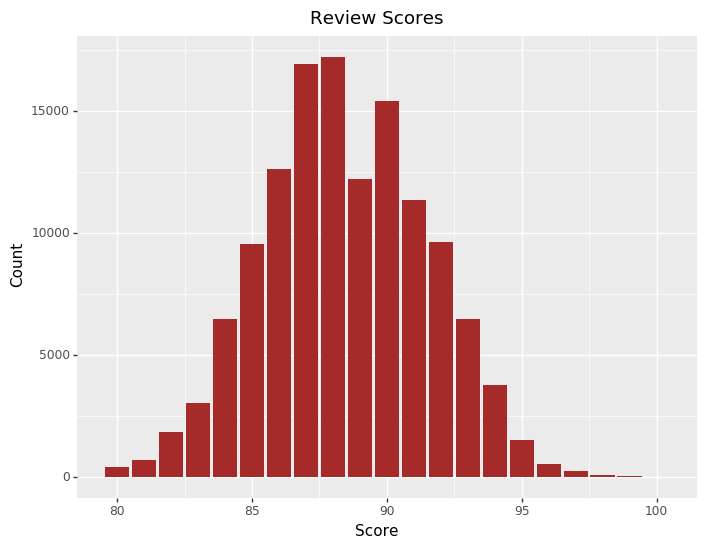

<ggplot: (296437196)>

In [24]:
# 리뷰 스코어 분포
(ggplot(reviews)
 + aes(x='points')
 + geom_bar(fill='brown')
 + ggtitle("Review Scores")
 + xlab('Score')
 + ylab('Count')
 + theme(figure_size=(8, 6))
)

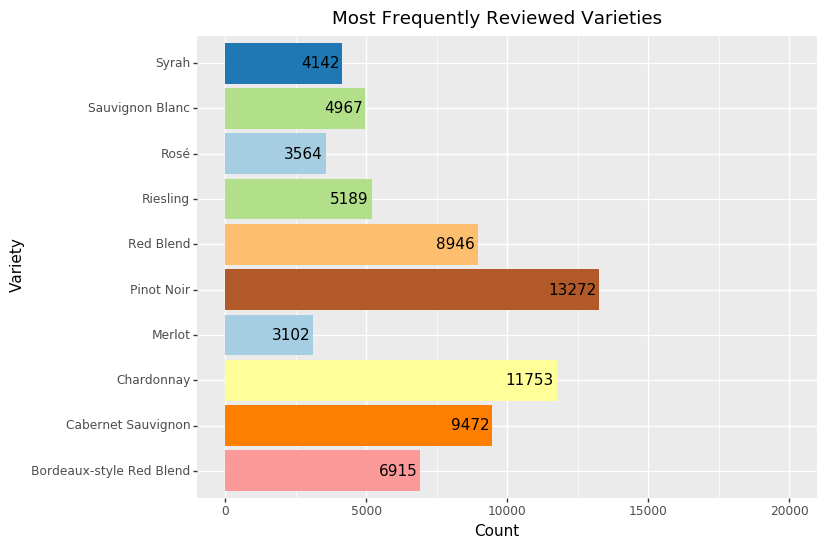

<ggplot: (-9223372036569062077)>

In [25]:
df = (reviews
    .groupby('variety').variety.agg([len])
    .sort_values(by='len', ascending=False)
    .reset_index()
    .head(10)
)

(ggplot(df)
 + aes(x='variety', y='len', fill='len')
 + geom_col()
 + ggtitle("Most Frequently Reviewed Varieties")
 + geom_text(aes(label='len'), ha='right', nudge_y=-100)
 + xlab('Variety')
 + ylab('Count')
 + coord_flip(ylim=(0, 20000)) # rotate axis
 + scale_fill_cmap('Paired') # set custom colormap
 + guides(fill=False) # remove legend
 + theme(figure_size=(8, 6))
)

In [26]:
# 자주 리뷰되는 품종
common_wines = reviews.loc[reviews.variety.isin(df.variety.values)]
common_wines.shape

(71322, 13)

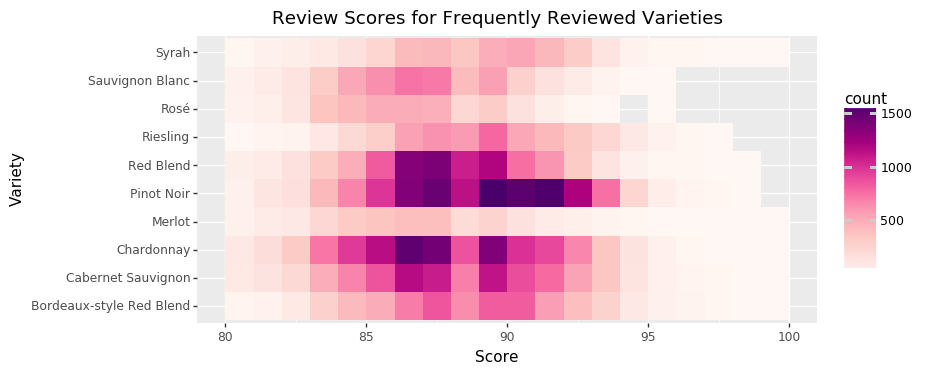

<ggplot: (-9223372036580381801)>

In [27]:
(ggplot(common_wines)
 + aes('points', 'variety')
 + geom_bin2d(bins=20)
 + coord_fixed(ratio=1)
 + ggtitle("Review Scores for Frequently Reviewed Varieties")
 + xlab('Score')
 + ylab('Variety')
 + scale_fill_cmap('RdPu')
 + theme(figure_size=(8, 4))
)

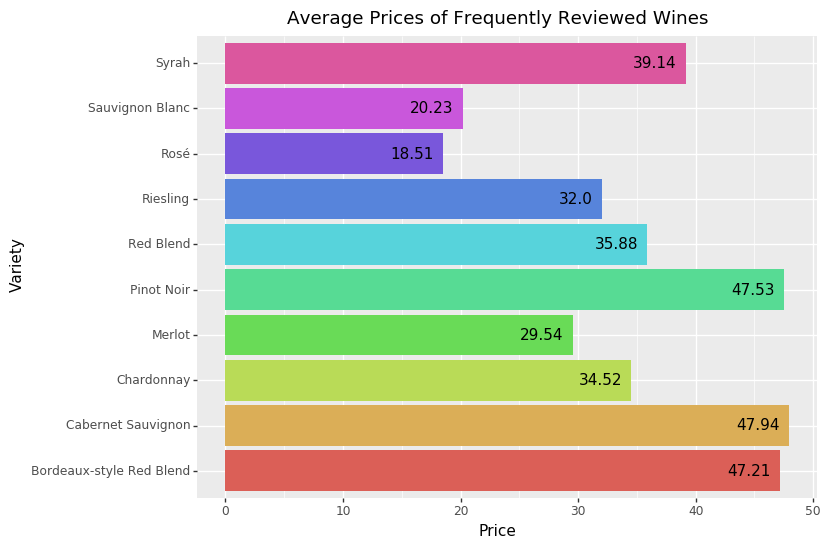

<ggplot: (-9223372036569188078)>

In [28]:
df = (common_wines
    .groupby('variety').price.mean()
    .reset_index()
    .round(2)
)

(ggplot(df)
 + aes(x='variety', y='price', fill='variety')
 + geom_col()
 + ggtitle("Average Prices of Frequently Reviewed Wines")
 + geom_text(aes(label='price'), ha='right', nudge_y=-0.8)
 + xlab('Variety')
 + ylab('Price')
 + coord_flip()
 + guides(fill=False)
 + theme(figure_size=(8, 6))
)

### 와인 가격

In [29]:
# 비싼 와인일수록 리뷰에서 좋은 점수를 받을까요?
# 가장 비싼 와인과 저렴한 와인을 비교해 봅니다.
compare_price_wines = common_wines.loc[common_wines.variety.isin(['Rosé', 'Cabernet Sauvignon'])]
compare_price_wines.shape

(13036, 13)

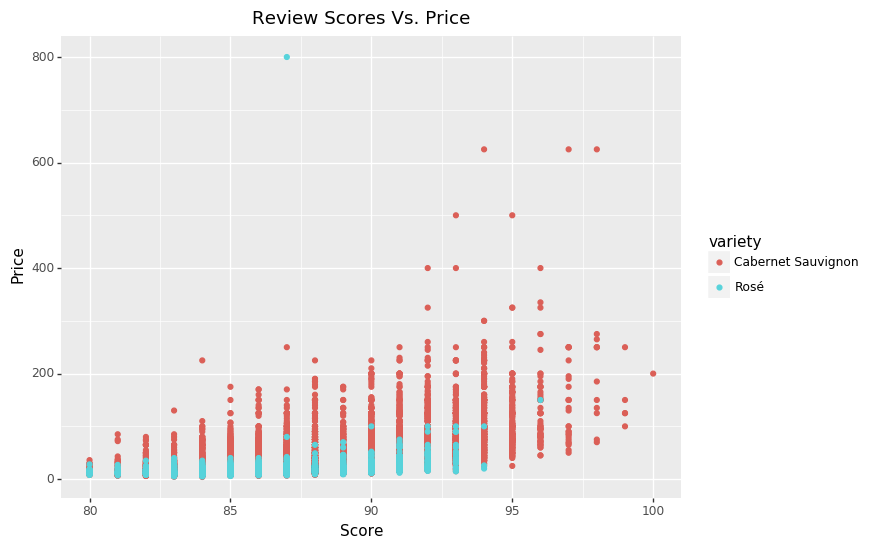

<ggplot: (-9223372036558393649)>

In [30]:
(ggplot(compare_price_wines)
 + aes(x='points', y='price', color='variety')
 + geom_point()
 + ggtitle("Review Scores Vs. Price")
 + xlab('Score')
 + ylab('Price')
 + theme(figure_size=(8, 6))
)

까베르네 소비뇽 와인은 일반적으로 로즈 와인보다 높은 점수를 받고 비쌉니다. 까르베네 쇼비뇽 와인 중 일부는 400달러 이상으로 가격이 책정되었습니다. 어떤 로제 와인은 같은 종류의 다른 와인들과는 달리 800달러에 판매되었고 높은 가격에도 불구하고 평균 87점을 받았습니다.

### 와이너리

In [31]:
# 어떤 와이너리가 좋은 와인을 만들까요?
winery_df = (reviews
    .groupby('winery').points.agg(['mean'])
    .sort_values(by='mean', ascending=False)
    .reset_index()
    .rename(columns={'mean': 'price'})
    .round(2)
    .head(10)
)
df

,variety,price
0,Bordeaux-style Red Blend,47.21
1,Cabernet Sauvignon,47.94
2,Chardonnay,34.52
3,Merlot,29.54
4,Pinot Noir,47.53
5,Red Blend,35.88
6,Riesling,32.00
7,Rosé,18.51
8,Sauvignon Blanc,20.23
9,Syrah,39.14


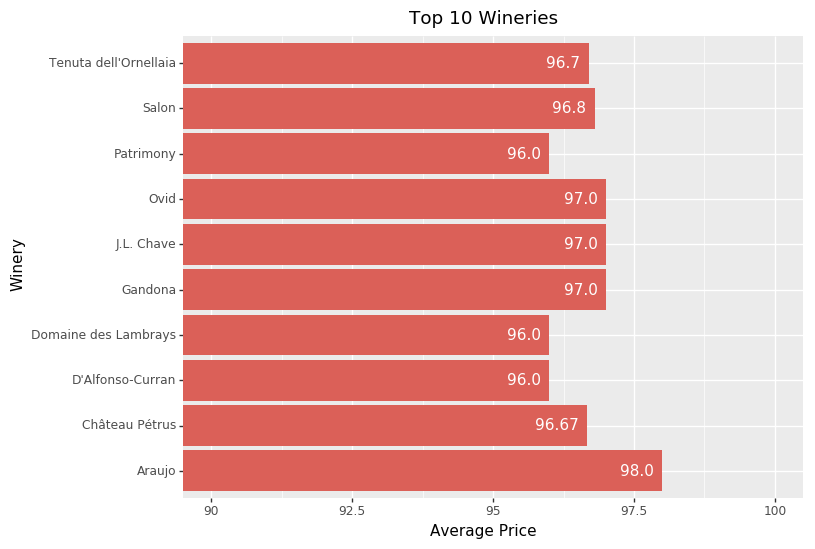

<ggplot: (299083254)>

In [32]:
(ggplot(winery_df)
 + aes(x='winery', y='price')
 + geom_col(fill='#DB6058')
 + ggtitle("Top 10 Wineries")
 + geom_text(aes(label='price'), color='white', ha='right', nudge_y=-0.15)
 + xlab('Winery')
 + ylab('Average Price')
 + coord_flip(ylim=(90, 100))
 + theme(figure_size=(8, 6))
)

### 와인 생산연도

In [33]:
# title 컬럼에서 정규표현식을 사용하여 생산연도를 가져옵니다.
print(reviews.shape)
reviews['year'] = reviews.title.str.extract('((19|20)\d{2})')[0]
print(reviews.shape)

(129971, 13)
(129971, 14)


In [34]:
df = (reviews
      .loc[reviews.year.notnull()]
      .assign(year = reviews.year.astype('float64'))
     )
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0


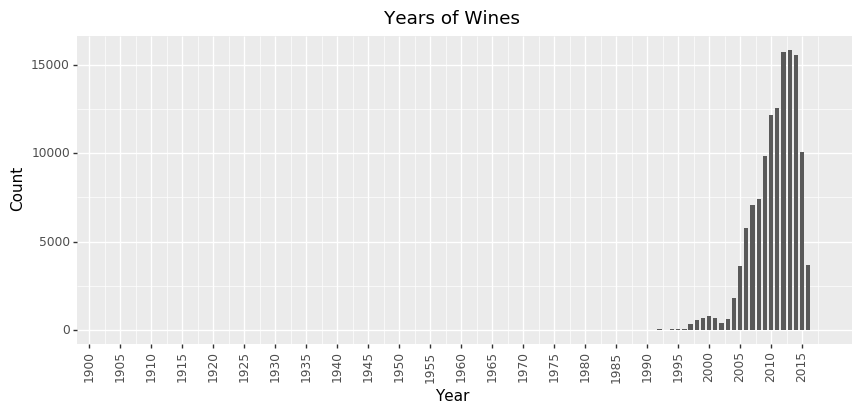

<ggplot: (298689032)>

In [35]:
(ggplot(df)
 + aes('year')
 + geom_bar(width=0.7)
 + ggtitle('Years of Wines')
 + xlab('Year')
 + ylab('Count')
 + theme(axis_text_x=element_text(rotation=90),
         figure_size=(10, 4))
 + scale_x_continuous(breaks=range(1900, 2020, 5))
)

히스토크램이 한 쪽에 치우쳐져 있습니다. 대부분의 리뷰는 2000년 이후에 생산된 와인에 대한 것입니다. 2000년 이전 유통에 대해 살펴보겠습니다.

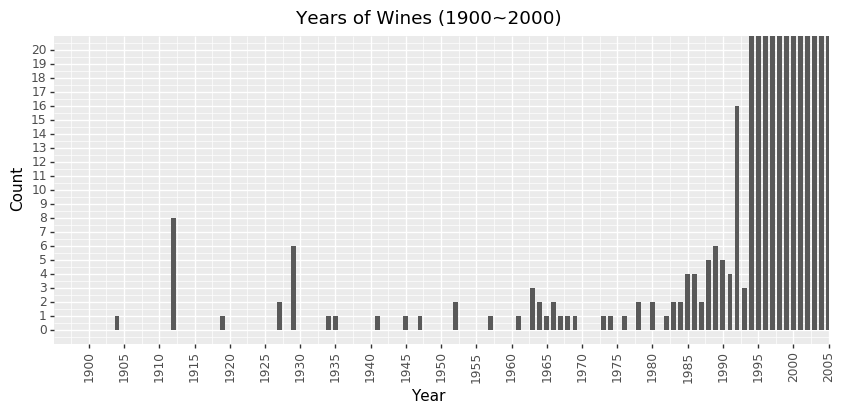

<ggplot: (297750550)>

In [36]:
(ggplot(df)
 + aes('year')
 + geom_bar(width=0.7)
 + ggtitle('Years of Wines (1900~2000)')
 + xlab('Year')
 + ylab('Count')
 + theme(axis_text_x=element_text(rotation=90),
        figure_size=(10, 4))
 + scale_x_continuous(breaks=range(1900, 2020, 5))
 + scale_y_continuous(breaks=range(0, 21, 1))
 + coord_cartesian(xlim=(1900, 2000), ylim=(0, 20))
)

지난 세기에 생산된 와인을 자세히 살펴보기 위해 y축을 20으로 제한했다. 이 기간동안 생산된 와인의 대부분은 1990년 이후 생산된 것이다.

### 오래된 와인이 좀 더 비쌀까요?

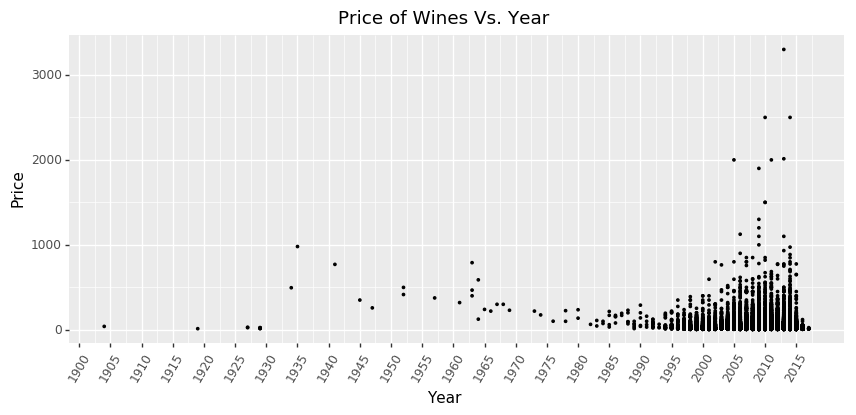

<ggplot: (297706283)>

In [37]:
(ggplot(df)
 + aes(x='year', y='price')
 + geom_point(size=0.5)
 + ggtitle('Price of Wines Vs. Year')
 + xlab('Year')
 + ylab('Price')
 + theme(axis_text_x=element_text(rotation=60),
        figure_size=(10, 4))
 + scale_x_continuous(breaks=range(1900, 2020, 5))
)

최근의 와인 대다수와 비교해 봤을때 오래된 와인은 시간이 지남에 따라 가격이 바싸지는 것으로 보인다.
그럼 리뷰점수는 어떨까?

### 오래된 와인이 맛이 더 좋을까요?

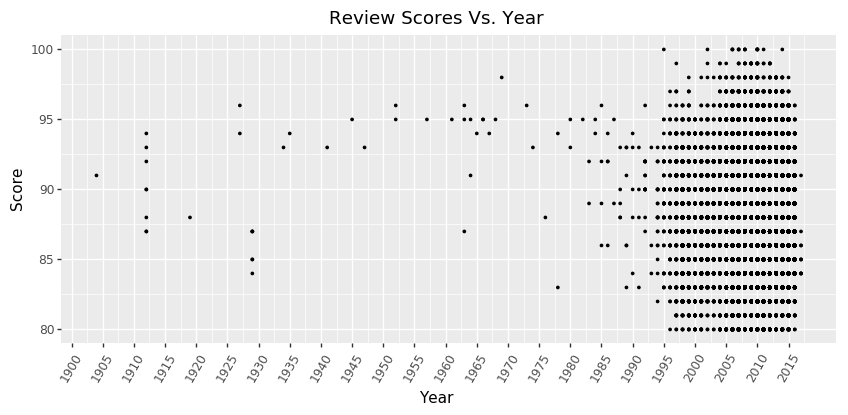

<ggplot: (297706276)>

In [38]:
(ggplot(df)
 + aes(x='year', y='points')
 + geom_point(size=0.5)
 + ggtitle('Review Scores Vs. Year')
 + xlab('Year')
 + ylab('Score')
 + theme(axis_text_x=element_text(rotation=60),
        figure_size=(10, 4))
 + scale_x_continuous(breaks=range(1900, 2020, 5))
)

흥미롭게도 대부분의 오래된 와인은 90점 이상 높은 평점을 받았다. 이는 두 가지로 해석해 볼 수 있는데 하나는 오래된 와인이 실제로 더 맛있을 수 있다는 것이고 반면에 심사를 위해  고품질 와인을 선정해서 샘플링에 바이어스가 있을 수도 있습니다.

그리고 다음으로 연도별 와인가격과 리뷰 점수로 포인트를 표현해 봅니다.

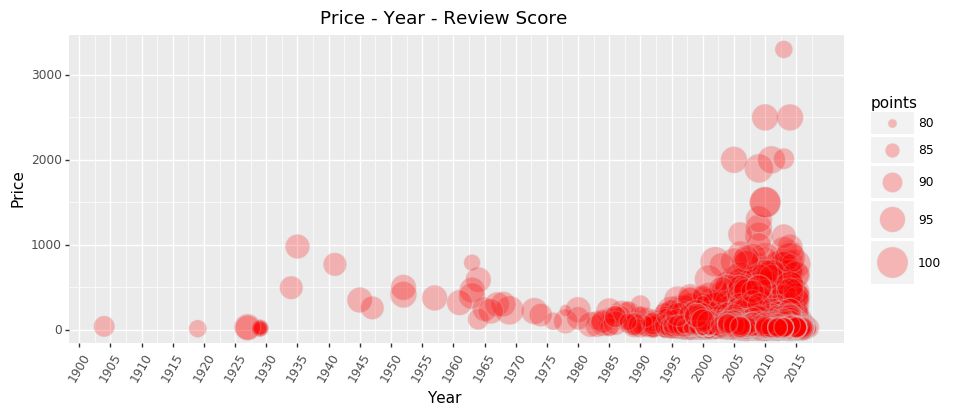

<ggplot: (297542653)>

In [39]:
(ggplot(df)
 + aes(x='year', y='price', size='points')
 + geom_point(fill='red', color='lightgray', alpha=0.25)
 + ggtitle('Price - Year - Review Score')
 + xlab('Year')
 + ylab('Price')
 + theme(axis_text_x=element_text(rotation=60),
        figure_size=(10, 4))
 + scale_x_continuous(breaks=range(1900, 2020, 5))
 + scale_size_radius(range=(3, 12))
)